1. Generative Models for Text

In [0]:
import keras
import numpy as np
import re
import os
import sys
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import CuDNNLSTM
from keras.layers import Flatten
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
in_sentences=[]
text = ""
raw_text = ""

for filename in os.listdir('./books'):
  if(filename !=".ipynb_checkpoints" ):
    text = "".join(open('./books'+'/'+filename, encoding = "ascii",errors="ignore", mode="r").readlines())
    raw_text = raw_text + re.sub("\\s+", " ", text).lower()


In [0]:
chars = sorted(list(set(raw_text)))
char_pairs = list(enumerate(chars))
char2nt = dict((c, i) for i, c in enumerate(char_pairs))
n_c = len(raw_text)
n_v = len(chars)
print(chars)

[' ', '!', '"', '$', '%', '&', "'", '(', ')', '*', '+', '-', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '>', '?', '[', '\\', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']


In [0]:
W = 100
X = []
Y = []
l = n_c-W
for i in range(0, l, 1):
    X.append([char2int[char] for char in raw_text[i:i + W]])
    Y.append(char2int[raw_text[i + W]])

X = np.reshape(X, (len(X), W, 1))/ float(n_v)
y = np_utils.to_categorical(Y)

In [0]:
model = Sequential()
model.add(CuDNNLSTM(256, input_shape =(X.shape[1], X.shape[2]), return_sequences = True))
model.add(Flatten())
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [0]:
file="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(file, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [0]:
model.fit(X, y, epochs=30, batch_size=128, callbacks=callbacks_list)

Epoch 1/30
3474845/3474845 [==============================] - 1101s 317us/step - loss: 2.6024

Epoch 00001: loss improved from inf to 2.60245, saving model to weights-improvement-01-2.6024.hdf5
Epoch 2/30
3474845/3474845 [==============================] - 1100s 317us/step - loss: 2.4213

Epoch 00002: loss improved from 2.60245 to 2.42130, saving model to weights-improvement-02-2.4213.hdf5
Epoch 3/30
3474845/3474845 [==============================] - 1101s 317us/step - loss: 2.2397

Epoch 00003: loss improved from 2.42130 to 2.23966, saving model to weights-improvement-03-2.2397.hdf5
Epoch 4/30
3474845/3474845 [==============================] - 1101s 317us/step - loss: 2.0950

Epoch 00004: loss improved from 2.23966 to 2.09496, saving model to weights-improvement-04-2.0950.hdf5
Epoch 5/30
3474845/3474845 [==============================] - 1100s 317us/step - loss: 1.9912

Epoch 00005: loss improved from 2.09496 to 1.99125, saving model to weights-improvement-05-1.9912.hdf5
Epoch 6/30
347

In [0]:
raw_text = "There are those who take mental phenomena naively just as they would physical phenomena This school of psychologists tends not to emphasize the object".lower()
chars = sorted(list(set(raw_text)))
c_pairs = list(enumerate(chars))
char2int = dict((c, i) for i, c in c_pairs)
int2char = dict((i, c) for i, c in c_pairs)
n_c = len(raw_text)
n_v = len(chars)
W = 100
X = []
Y = []
for i in range(0, n_c - W, 1):
	X.append([char2int[char] for char in raw_text[i:i + W]])
	Y.append(char2int[raw_text[i + W]])
X = numpy.reshape(X, (len(X), W, 1))
X /= n_v
y = np_utils.to_categorical(Y)
model2 = Sequential()
model2.add(CuDNNLSTM(64, input_shape =(X.shape[1], X.shape[2]), return_sequences = True))
model2.add(Flatten())
model2.add(Dense(y.shape[1], activation='softmax'))
model2.load_weights("weights-improvement-29-1.5198.hdf5", by_name=True)
model2.compile(loss='categorical_crossentropy', optimizer='adam')

import random
# pick a random seed
p = X[random.randint(0, len(X)-1)]
# generate text
for i in range(1000):
	x = np.reshape(pattern, (1, len(pattern), 1))/n_v
	index = numpy.argmax(model.predict(x,verbose=0))
	result = int2char[index]
	sys.stdout.write(result)
	p = p.append(index)
  l_p = len(p)
	p = p[1:l_p]




difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult want difficult 

*2*. (Deep) CNNs for Image Colorization

In [0]:
import io
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dropout, MaxPooling2D, Conv2D, Dense
from keras.datasets import cifar10
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.color import rgb2grey

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X = np.vstack((X_train,X_test))
y = np.vstack((y_train,y_test)).flatten()
pairs =  enumerate(y)
for i,j in pairs:
  if j == 2:
    k = i
X = X[k]
y = y[k]

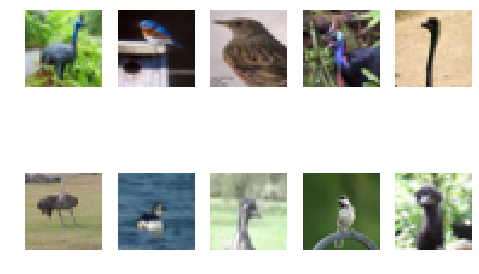

In [0]:
for i in range(0,10):
    axis = plt.subplot(2,5,i+1)
    arr = X[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

In [0]:
X = X.reshape((6144000,3))
kmeans = KMeans(n_clusters=4,random_state=0).fit(X)
X2 = X
for i in range(len(X)):
    label = kmeans.labels_[i]
    X_2[i] = kmeans.cluster_centers_[label]

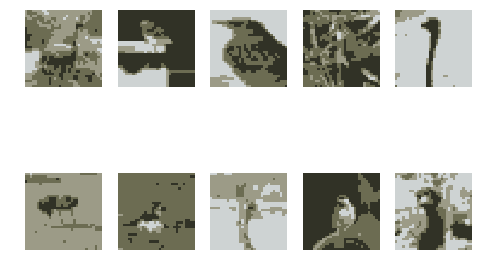

In [0]:
X3 = X2.reshape((6000,32,32,3))
for i in range(0,10):
    axis = plt.subplot(2,5,i+1)
    arr = X3[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

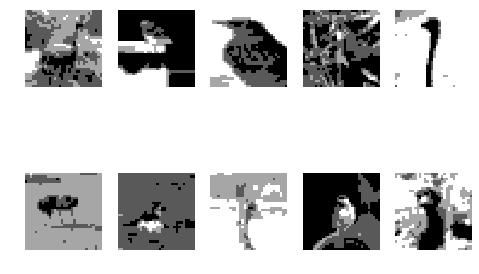

In [0]:
y2 = keras.utils.to_categorical(kmeans.labels_).reshape((6000,32,32,4))
X = X.reshape((6000,32,32,3))
X4 = []
for i in range(len(X)):
    temp = rgb2grey(X[i]).tolist()
    X4.append(temp)
X4 = np.array(X4)

for i in range(0,10):
    axis = plt.subplot(2,5,i+1)
    arr = X_N[i]
    axis.imshow(arr,cmap='gray')
    plt.axis('off')
plt.show()

In [0]:
X_N = X_N.reshape((6000,32,32,1))
X_train = X_N[0:5984]
y_train = y_N[0:5984]
X_test = X_N[-16:]
y_test = y_N[-16:]

X_train = np.vstack((X_train,X_test))
y_train = np.vstack((y_train,y_test))

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same', input_shape = (32,32,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Dense(32, activation='softmax'))


Train on 5400 samples, validate on 600 samples
Epoch 1/30
5400/5400 [==============================] - 5s 969us/step - loss: 1.3734 - acc: 0.3291 - val_loss: 1.3644 - val_acc: 0.3317
Epoch 2/30
5400/5400 [==============================] - 4s 667us/step - loss: 1.3555 - acc: 0.3385 - val_loss: 1.3546 - val_acc: 0.3317
Epoch 3/30
5400/5400 [==============================] - 4s 671us/step - loss: 1.3474 - acc: 0.3385 - val_loss: 1.3500 - val_acc: 0.3317
Epoch 4/30
5400/5400 [==============================] - 4s 675us/step - loss: 1.3432 - acc: 0.3385 - val_loss: 1.3476 - val_acc: 0.3317
Epoch 5/30
5400/5400 [==============================] - 4s 669us/step - loss: 1.3406 - acc: 0.3385 - val_loss: 1.3458 - val_acc: 0.3317
Epoch 6/30
5400/5400 [==============================] - 4s 668us/step - loss: 1.3385 - acc: 0.3385 - val_loss: 1.3440 - val_acc: 0.3317
Epoch 7/30
5400/5400 [==============================] - 4s 674us/step - loss: 1.3363 - acc: 0.3385 - val_loss: 1.3418 - val_acc: 0.3317
E

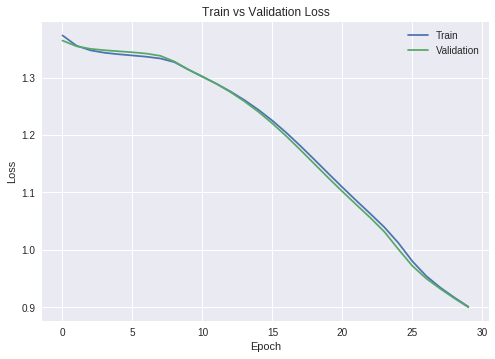

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [0]:
p = model.predict(X_test).reshape((16384,4))[:,0:3]
l = len(predictions)
for i in range(l):
    p[i] = kmeans.cluster_centers_[np.argmax(predictions[i])]
p = p.reshape((16,32,32,3))


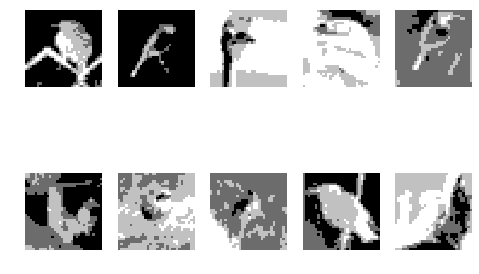

In [0]:
for i in range(0,10):
    axis = plt.subplot(2,5,i+1)
    arr = X_test.reshape(16,32,32)[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

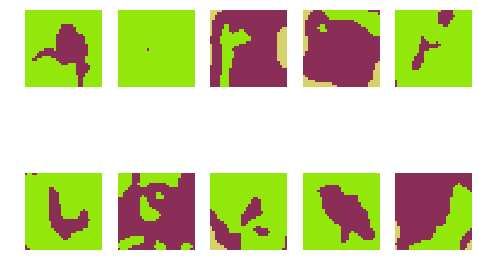

In [0]:
for i in range(0,10):
    axis = plt.subplot(2,5,i+1)
    arr = pred[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()